In [1]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
import os
from os.path import join
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import model_from_json
import PIL

In [2]:
# load the saved model
model_path = 'model.json'
weight_path = 'model.h5'

# load json and create model
with  open(model_path, 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)
print('Model architecture loaded.')

# load weights into new model
model.load_weights(weight_path)
print("Model weights loaded.")

Model architecture loaded.
Model weights loaded.


In [3]:
image_size = 224
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [4]:
# make predictions on smaple images
demo_dir = '../images/test/'
fnames = os.listdir(demo_dir)
image_paths = [demo_dir + fname for fname in fnames]
labels = [1 if fname.startswith('drug') else 0 for fname in fnames]
n_files = len(image_paths)

demo_data = read_and_prep_images(image_paths)
preds = np.argmin(model.predict(demo_data),1)


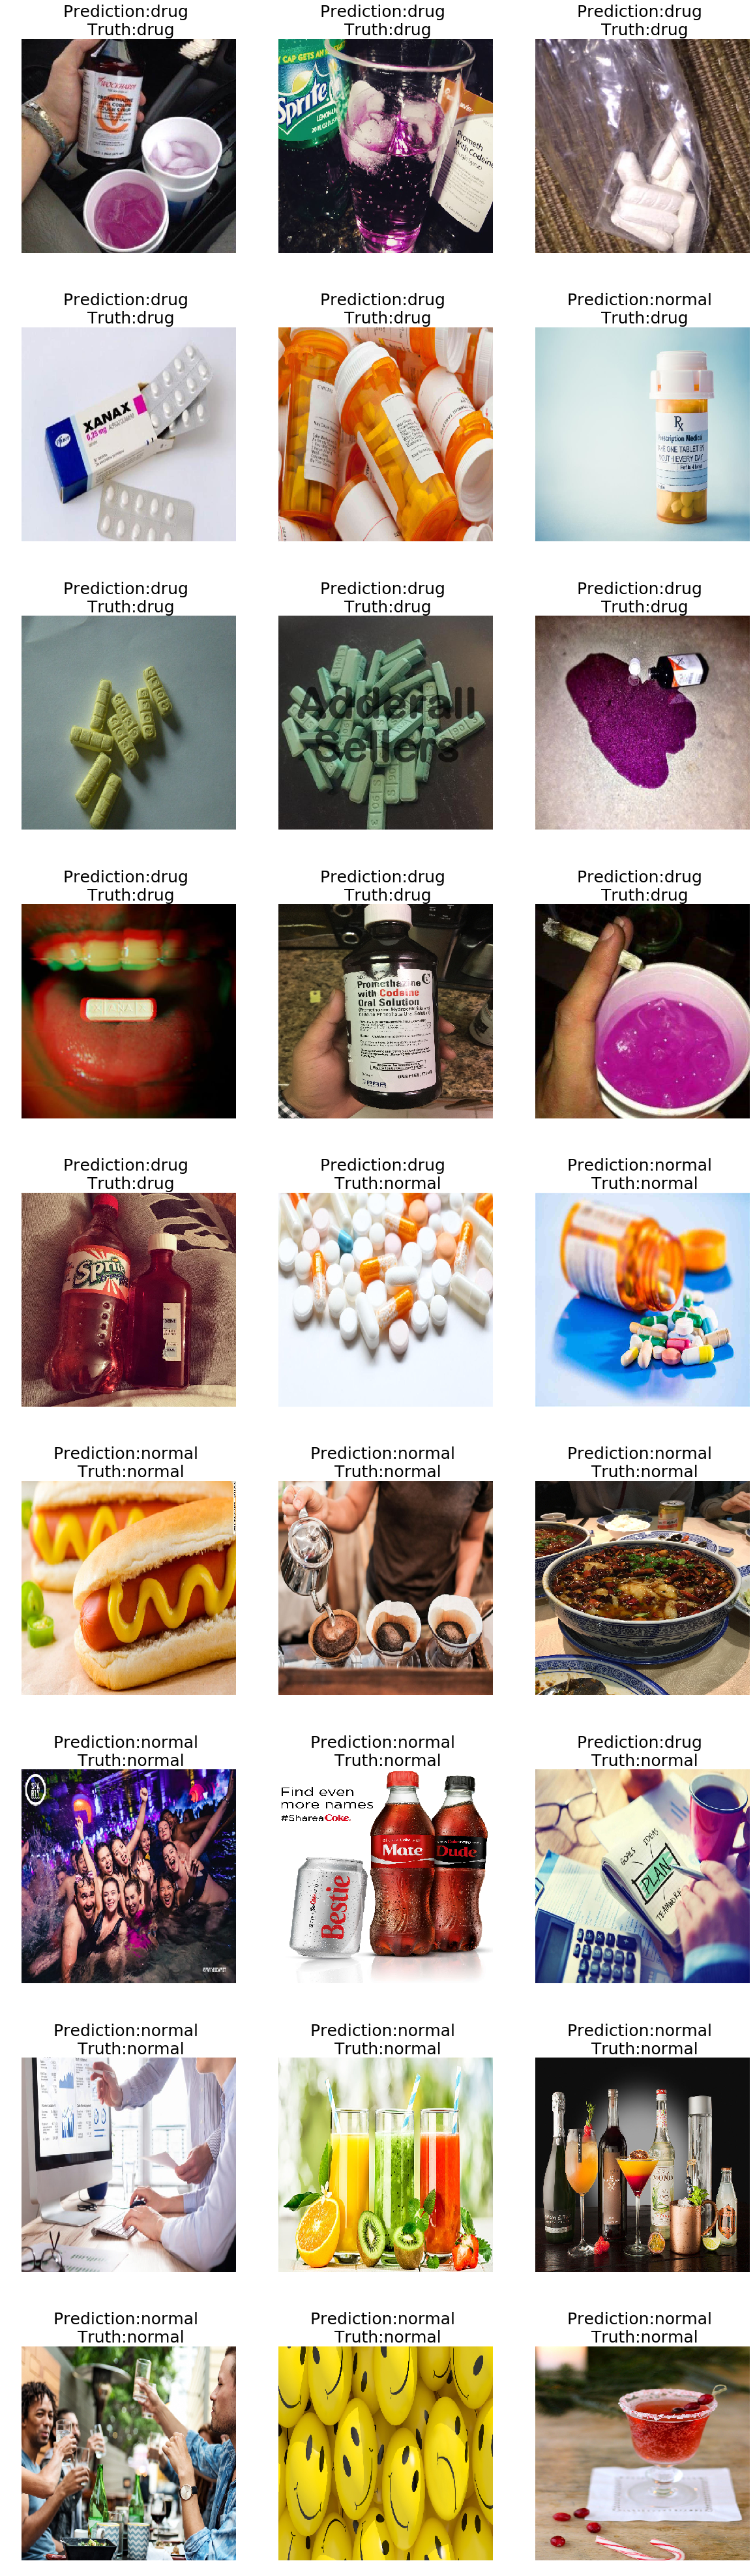

In [5]:
# Display prediction result
from matplotlib import pyplot as plt
%matplotlib inline
classes = ['normal', 'drug']

plt.figure(figsize=(20,80))
for i in range(n_files):
    ax = plt.subplot(10,3,i+1)
    img = load_img(image_paths[i], target_size=(512, 512))
    array = np.array(img_to_array(img))/255
    plt.imshow(array)
    ax.axis('off')
    ax.set_title('Prediction:{} \n Truth:{}'.format(classes[preds[i]], classes[labels[i]]), fontsize = 25)
